# Decision Functions Demos

* demonstrate the decision and probability functions of different classifiers


## SVN:

in the context of Support Vector Machines (SVMs), the .decision_function(mX) method returns the distance of each sample in mX from the decision boundary (or hyperplane) defined by the model. This distance can be positive or negative, depending on which side of the hyperplane the sample lies.

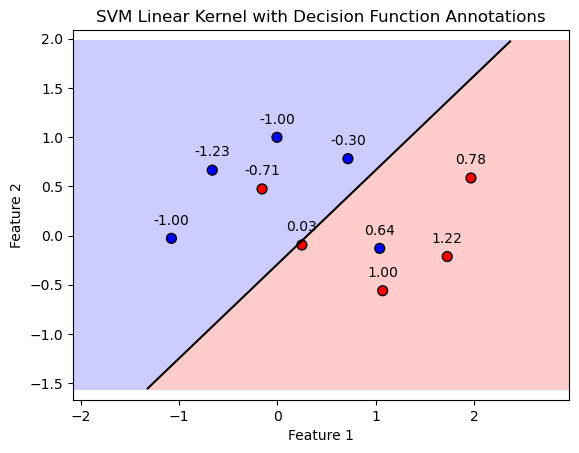

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from typing import Callable, Dict, List, Optional, Set, Tuple, Union


# Constants for plotting
FIG_SIZE_DEF = (8, 6)
ELM_SIZE_DEF = 50
CLASS_COLOR = ('blue', 'red')

# Generate binary class data
numSamples0, numSamples1 = 5, 5
noiseLevel = 0.1
mX, vY = make_moons(n_samples=(numSamples0 + numSamples1), noise=noiseLevel)

# Fit the SVM model with a linear kernel
paramC = 1.0
kernelType = 'linear'
oSVM = SVC(C=paramC, kernel=kernelType).fit(mX, vY)

# Plotting function
def PlotBinaryClassDataWithDecisionFunction(mX: np.ndarray, vY: np.ndarray, model: SVC, figSize: Tuple[int, int] = FIG_SIZE_DEF, 
                                            elmSize: int = ELM_SIZE_DEF, classColor: Tuple[str, str] = CLASS_COLOR):
    """
    Plots binary 2D data, decision boundary, margins, and annotates with decision function values.
    """
    # Create mesh grid
    x_min, x_max = mX[:, 0].min() - 1, mX[:, 0].max() + 1
    y_min, y_max = mX[:, 1].min() - 1, mX[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Plot decision boundary and margins
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], alpha=0.2, colors=['blue', 'red'])
    plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='-')

    # Plot data points
    plt.scatter(mX[:, 0], mX[:, 1], c=vY, s=elmSize, cmap=plt.cm.bwr, edgecolors='k')
    
    # Annotate data points with decision function values
    decision_function = model.decision_function(mX)
    for i, txt in enumerate(decision_function):
        plt.annotate(f'{txt:.2f}', (mX[i, 0], mX[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Linear Kernel with Decision Function Annotations')
    plt.axis('equal')
    plt.show()

# Plot the data points, decision boundary, margins, and decision function values
PlotBinaryClassDataWithDecisionFunction(mX, vY, oSVM)


## svm probability:

* SVM model configured with probability=True, the .predict_proba method provides the probability estimates for all classes for each input sample.
* especially useful in binary and multiclass classification problems where not only the predicted class but also the certainty of the predictions matters.

For a given input sample, .predict_proba outputs a probability distribution over all possible classes. In a binary classification scenario, this means you get a probability for class 0 and class 1, where the sum of these probabilities is 1. These probabilities indicate the model's confidence in each class for the given sample.



[[0.19244369 0.80755631]
 [0.57061315 0.42938685]
 [0.81839768 0.18160232]
 [0.32768668 0.67231332]
 [0.26145735 0.73854265]
 [0.26145735 0.73854265]
 [0.74698556 0.25301444]
 [0.77996876 0.22003124]
 [0.66097056 0.33902944]
 [0.39306926 0.60693074]]


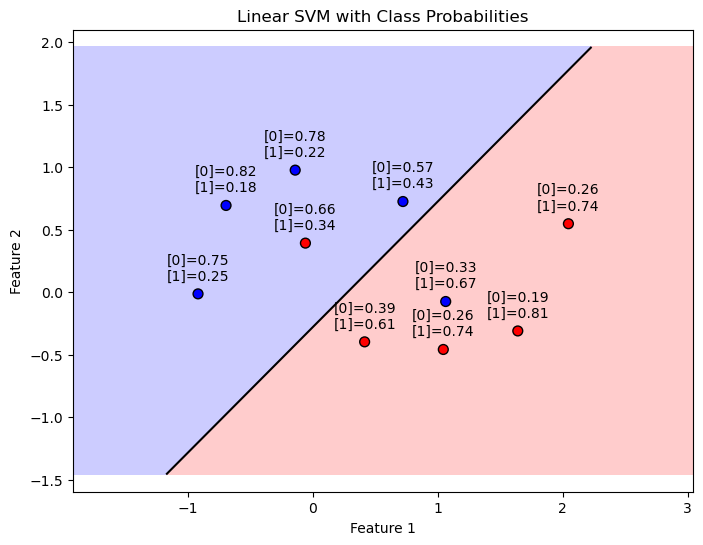

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Constants for plotting
FIG_SIZE_DEF = (8, 6)
ELM_SIZE_DEF = 50
CLASS_COLOR = ('blue', 'red')

# Generate binary class data
numSamples0, numSamples1 = 5, 5
noiseLevel = 0.1
mX, vY = make_moons(n_samples=(numSamples0 + numSamples1), noise=noiseLevel)

# Fit the SVM model with a linear kernel and probability estimates
paramC = 1.0
kernelType = 'linear'
oSVM = SVC(C=paramC, kernel=kernelType, probability=True).fit(mX, vY)
svc_dec_fund = oSVM.decision_function(mX)

# Plotting function with probability annotations
def PlotBinaryClassDataWithProbabilities(mX: np.ndarray, vY: np.ndarray, model: SVC, figSize: Tuple[int, int] = FIG_SIZE_DEF, 
                                         elmSize: int = ELM_SIZE_DEF, classColor: Tuple[str, str] = CLASS_COLOR):
    """
    Plots binary 2D data, decision boundary, margins, and annotates with class probabilities.
    """
    x_min, x_max = mX[:, 0].min() - 1, mX[:, 0].max() + 1
    y_min, y_max = mX[:, 1].min() - 1, mX[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=figSize)
    plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], alpha=0.2, colors=classColor)
    plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='-')

    # Plot data points
    plt.scatter(mX[:, 0], mX[:, 1], c=vY, s=elmSize, cmap=plt.cm.bwr, edgecolors='k')
    
    # Annotate data points with class probabilities
    probabilities = model.predict_proba(mX)
    print(probabilities)
    for i, prob in enumerate(probabilities):
        plt.annotate(f'[0]={prob[0]:.2f}\n[1]={prob[1]:.2f}', (mX[i, 0], mX[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Linear SVM with Class Probabilities')
    plt.axis('equal')
    plt.show()

    return probabilities

# Plot the data points, decision boundary, margins, and class probabilities
probabilities_orig = PlotBinaryClassDataWithProbabilities(mX, vY, oSVM)


In [3]:
isMatch = np.all(np.argmax(probabilities_orig, axis = 1) == (svc_dec_fund > 0))
print(f'The decision boundary and probability score match: {isMatch}')

The decision boundary and probability score match: True


## alternative calc

The `SVC` class uses the [_Platt Scaling_](https://en.wikipedia.org/wiki/Platt_scaling) for estimating the probabilities.  
As such, it doesn't always match the results given by the _decision boundary_ (Though it is based on it).

In this section an alternative method is presented where:

$$ p \left( \hat{y}_{i} = 1 \mid {d}_{i} \right) = 0.5 \left( 1 + \operatorname{sign} \left( {d}_{i} \right) \left( 1 - {e}^{- \left| {d}_{i} \right|} \right) \right) $$

Where ${d}_{i} = \boldsymbol{w}^{T} \boldsymbol{x}_{i} - b$ is the "distance" of the point (With a sign) form the decision boundary.

In [4]:
def SvcBinProb( vD: np.ndarray ) -> np.ndarray:
    mP = np.zeros(shape = (vD.shape[0], 2)) #<! Pre allocate the output

    mP[:, 1] = 0.5 * (1 + np.sign(vD) * (1 - np.exp(-np.abs(vD)))) #<! The probability of the positive class
    mP[:, 0] = 1 - mP[:, 1] #<! The probability of the negative class

    return mP

probabilities_altr = SvcBinProb(svc_dec_fund)

# Printing side by side in pretty format
print("probabilities_orig\t\tprobabilities_altr")
for orig, altr in zip(probabilities_orig, probabilities_altr):
    orig_str = f"{orig[0]:.6f}, {orig[1]:.6f}"
    altr_str = f"{altr[0]:.6f}, {altr[1]:.6f}"
    print(f"{orig_str}\t\t{altr_str}")



probabilities_orig		probabilities_altr
0.192444, 0.807556		0.127440, 0.872560
0.570613, 0.429387		0.601870, 0.398130
0.818398, 0.181602		0.871692, 0.128308
0.327687, 0.672313		0.247458, 0.752542
0.261457, 0.738543		0.183940, 0.816060
0.261457, 0.738543		0.183940, 0.816060
0.746986, 0.253014		0.810040, 0.189960
0.779969, 0.220031		0.839685, 0.160315
0.660971, 0.339029		0.724298, 0.275702
0.393069, 0.606931		0.323532, 0.676468


# KNN

* kNN is a non-parametric method
* There's no decision function in the same sense as there is for SVMs. 
* the decision is based entirely on the class of the nearest neighbor.
* does not provide a .decision_function method for kNN models.
     
     `provide the .predict_proba method, which gives the probability estimates for the test data`

* For k=1, this method essentially returns 1 for the class of the nearest neighbor and 0 for all other classes, since there is only one neighbor considered and it fully determines the class of the sample.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

# Generate binary class data
numSamples0, numSamples1 = 5, 5
noiseLevel = 0.1
mX, vY = make_moons(n_samples=(numSamples0 + numSamples1), noise=noiseLevel)

def knn_for_K(k):
    # Fit the kNN model with k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(mX, vY)
    return knn

# Plotting function
def PlotKNNDecisionRegions(k,mX, vY, model, figSize=(8, 6)):
    # Create mesh grid
    x_min, x_max = mX[:, 0].min() - 1, mX[:, 0].max() + 1
    y_min, y_max = mX[:, 1].min() - 1, mX[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    # Predict class probabilities for each point in mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
    plt.colorbar()
    
    # Plot data points and annotate with probability of the predicted class
    probabilities = model.predict_proba(mX)
    for i, txt in enumerate(probabilities):
        label = f'{txt[vY[i]]:.2f}'
        plt.annotate(label, (mX[i, 0], mX[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.scatter(mX[:, 0], mX[:, 1], c=vY, cmap=plt.cm.RdBu, edgecolor='k', s=50)
    plt.title(f'kNN (k={k}) Decision Regions and Class Probabilities')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()




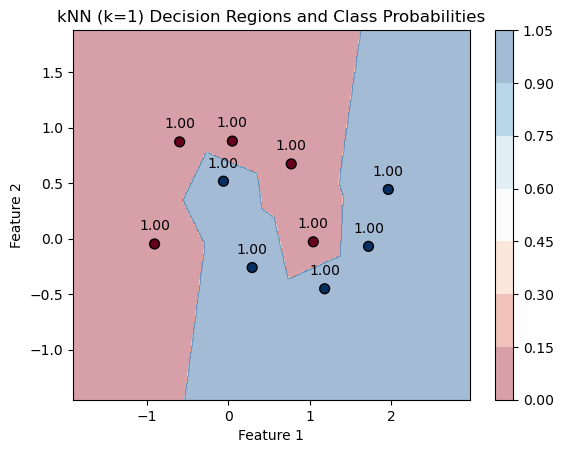

In [6]:
k=1
knn=knn_for_K(k)
PlotKNNDecisionRegions(k,mX, vY, knn)

for k=1. Each point is essentially adopting the class of its closest neighbor in the dataset, and since k=1, the "probability" of belonging to that class is 100%, as the prediction is entirely based on the nearest single neighbor.

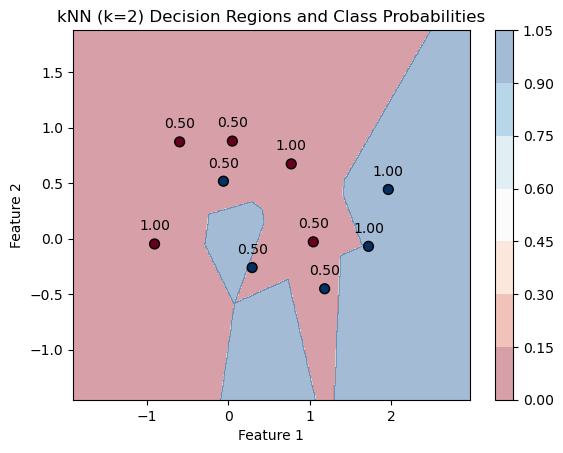

In [7]:
k=2
knn=knn_for_K(k)
PlotKNNDecisionRegions(k,mX, vY, knn)

### kneighbors


* .kneighbors method.
* This method can provide the distances to the kk nearest neighbors for each sample. 
* For k=1, it would give you the distance to the nearest neighbor, which could serve as an indicator of how "isolated" a sample is in its local neighborhood.


for k=1 Since a point is always zero distance from itself, you get zero distances for all points.
try with k=2:

[[0.         0.38171672]
 [0.         0.73031542]
 [0.         0.38171672]
 [0.         0.33464893]
 [0.         0.41211227]
 [0.         1.06408765]
 [0.         0.77142596]
 [0.         0.73031542]
 [0.         0.33464893]
 [0.         0.77854528]]


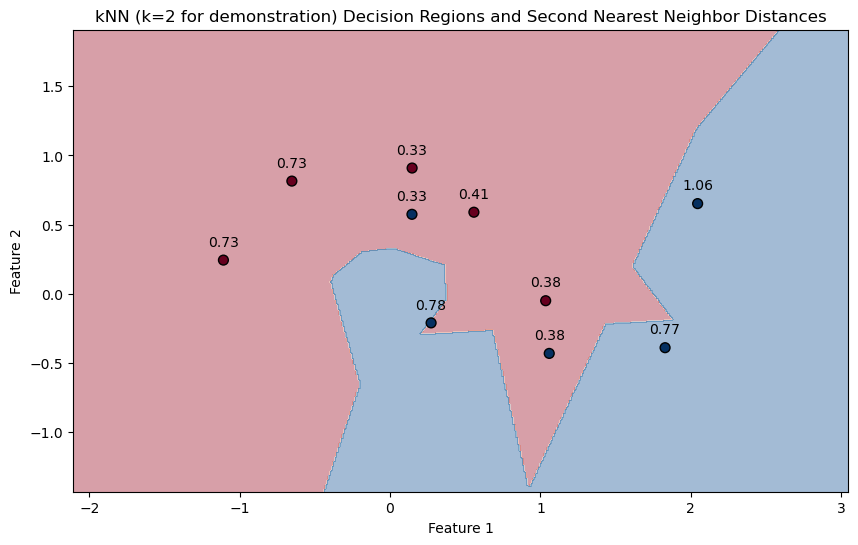

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

# Generate binary class data with some noise
numSamples0, numSamples1 = 5, 5
noiseLevel = 0.1
mX, vY = make_moons(n_samples=(numSamples0 + numSamples1), noise=noiseLevel)

# Fit the kNN model with k=1
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(mX, vY)

# Function to plot decision regions and annotate distances
def PlotKNNDecisionRegionsAndDistances(mX, vY, model):
    # Create mesh grid for the background colors
    x_min, x_max = mX[:, 0].min() - 1, mX[:, 0].max() + 1
    y_min, y_max = mX[:, 1].min() - 1, mX[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)

    # Plot data points
    plt.scatter(mX[:, 0], mX[:, 1], c=vY, cmap=plt.cm.RdBu, edgecolor='k', s=50)

    # Query with k=2 and take the distance to the second nearest neighbor
    distances, _ = model.kneighbors(mX)
    print(distances)
    second_nearest_distances = distances[:, 1]  # Take the second column for k=2

    for i, dist in enumerate(second_nearest_distances):
        plt.annotate(f'{dist:.2f}', (mX[i, 0], mX[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.title('kNN (k=2 for demonstration) Decision Regions and Second Nearest Neighbor Distances')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

PlotKNNDecisionRegionsAndDistances(mX, vY, knn)
